### Load Shapefile and Extract Coastline Boundaries

In [1]:
import geopandas as gpd
from shapely.geometry import MultiPolygon, Polygon

# Load the shapefile using geopandas
coastline = gpd.read_file('Data/geospatial/MLT_adm0.shp')

# Assuming 'coastline' has a column 'geometry' that contains the geometrical shapes,
# and that the coastline is the first entry in the GeoDataFrame.
coastline_geometry = coastline.geometry[0]

# Check if the geometry is MultiPolygon and handle accordingly
if isinstance(coastline_geometry, MultiPolygon):
    # Initialize an empty list to store all boundary coordinates
    all_boundary_coords = []
    # Iterate over each Polygon in the MultiPolygon
    for polygon in coastline_geometry.geoms:
        # If you want to simplify the geometry, uncomment the following line
        # polygon = polygon.simplify(tolerance=0.001, preserve_topology=True)
        # Extend the list with the current polygon's exterior coordinates
        all_boundary_coords.extend(list(polygon.exterior.coords))
elif isinstance(coastline_geometry, Polygon):
    # The geometry is a single Polygon, handle as before
    all_boundary_coords = list(coastline_geometry.exterior.coords)
else:
    raise ValueError("The geometry is neither a Polygon nor a MultiPolygon. Additional handling is required.")

### Display the Number of Boundary Coordinates Extracted

In [2]:
print("Number of boundary coordinates extracted:", len(all_boundary_coords))

Number of boundary coordinates extracted: 5024


### Plot Coastline Boundaries

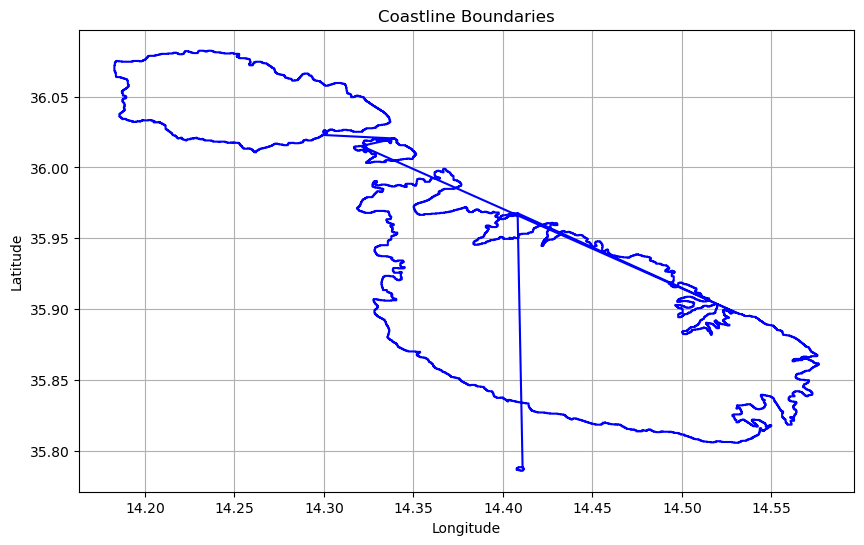

In [7]:
import matplotlib.pyplot as plt

# Extract the longitude and latitude coordinates from all_boundary_coords
lon_coords, lat_coords = zip(*all_boundary_coords)

# Plot the coastline boundaries
plt.figure(figsize=(10, 6))
plt.plot(lon_coords, lat_coords, color='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coastline Boundaries')
plt.grid(True)
plt.show()

### Exporting "all_boundary_coords"

In [4]:
import pickle

# Save the all_boundary_coords variable to a file
with open('Data/all_boundary_coords.pkl', 'wb') as f:
    pickle.dump(all_boundary_coords, f)